## Grouping poker hands together (Part 1: Data generation)
This notebook explores a method for grouping abstract groups of cards together. Lets first set up the possible cards that can take place.

In [1]:
from utils.utility import *
from effective_hand_strength import HandStrengthEval

hand_strength_evaluator = HandStrengthEval()

cards = get_all_possible_cards()

hole_cards = get_all_combinations(cards, 2)
community_cards = get_all_combinations(cards, 5)
flop_cards = get_all_combinations(cards, 3)

The hand strength evaluator evaluates the possibility that given a set of community cards, the opponent will loose.

In [2]:
hand_strength_evaluator.hand_strength(hole_cards[0], community_cards[0])

0.8395004625346901

Different hands have different probabilities of winning. Of course the probability of winning is dependent on the strength opponent and the board cards. Thus what we are going to do now is to generate 1000 possible card combinations for the whole game. Then we are going to see how the cards winning rate is distributed via a histogram.

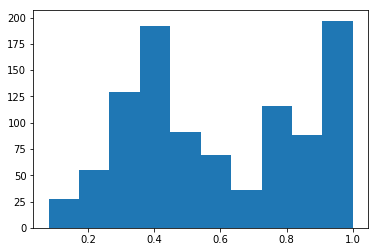

In [3]:
%matplotlib inline

from random import choice
from matplotlib import pyplot as plt 
import numpy as np

def contains_card_from_set(card_group, remainder):
    """
    Utility method
    """
    for c in remainder:
        if c in card_group:
            return True
    return False

def mc_get_card_group_hist(hand, remainder, num_samples=1000, hist_res=100):
    """
    Returns the histogram probability of winning using different
    cards.
    """
    lst = []
    remainder = list(filter(lambda x: x not in hand, remainder))
    for i in range(num_samples):
        res = choice(remainder)
        hs = hand_strength_evaluator.hand_strength(hand, res)
        lst.append(hs)
    return lst

def visuallize_histogram(hist):
    plt.hist(hist)
    plt.show()
    
res = mc_get_card_group_hist(hole_cards[0], community_cards)
visuallize_histogram(res)


The cards in question above are Ace of Spades and 2 of Spades. The graph above shows us that there is a high chance of winning (thus a peak at 1.0) but at the same time there is a possibility that the opponent may also have better cards. Thus, the peak at 0.4. The x axis of the above plot can be read as the probability of winning, and the y axis is the frequency accross multiple card configurations. A plot like this useful for deciding what startegy to use as it allows you to emulate the options. At the same time it captures the general idea that "it could go very well" or "it could go badly". Similar methods have been used in liberatus to solve "blueprints" of a game.

In [4]:
import pickle
data_set = {}
for hole_card in hole_cards[562:]:
    data_set[str(hole_card)] = mc_get_card_group_hist(hole_card, community_cards)
    print(str(len(data_set))+" down")
    pickle.dump(data_set, open("hole_cards.cards", "wb"))

1 down
2 down
3 down
4 down
5 down
6 down
7 down
8 down
9 down
10 down
11 down
12 down
13 down
14 down
15 down
16 down
17 down
18 down
19 down
20 down
21 down
22 down
23 down
24 down
25 down
26 down
27 down
28 down
29 down
30 down
31 down
32 down
33 down
34 down
35 down
36 down
37 down
38 down
39 down
40 down
41 down
42 down
43 down
44 down
45 down
46 down
47 down
48 down
49 down
50 down
51 down
52 down
53 down
54 down
55 down
56 down
57 down
58 down
59 down
60 down
61 down
62 down
63 down
64 down
65 down
66 down
67 down
68 down
69 down
70 down
71 down
72 down
73 down
74 down
75 down
76 down
77 down
78 down
79 down
80 down
81 down
82 down
83 down
84 down
85 down
86 down
87 down
88 down
89 down
90 down
91 down
92 down
93 down
94 down
95 down
96 down
97 down
98 down
99 down
100 down
101 down
102 down
103 down
104 down
105 down
106 down
107 down
108 down
109 down
110 down
111 down
112 down
113 down
114 down
115 down
116 down
117 down
118 down
119 down
120 down
121 down
122 down
123 down
1

In [2]:
import pickle
fp = pickle.load(open("2hand_groups.cards", "rb"))

In [3]:
fp

{"('SA', 'S2')": -1,
 "('SA', 'S3')": 0,
 "('SA', 'S4')": 0,
 "('SA', 'S5')": 0,
 "('SA', 'S6')": 0,
 "('SA', 'S7')": 0,
 "('SA', 'S8')": 0,
 "('SA', 'S9')": 0,
 "('SA', 'ST')": 0,
 "('SA', 'SJ')": 0,
 "('SA', 'SQ')": 0,
 "('SA', 'SK')": 0,
 "('SA', 'DA')": 1,
 "('SA', 'D2')": 0,
 "('SA', 'D3')": 0,
 "('SA', 'D4')": 0,
 "('SA', 'D5')": 0,
 "('SA', 'D6')": 0,
 "('SA', 'D7')": 0,
 "('SA', 'D8')": 0,
 "('SA', 'D9')": 0,
 "('SA', 'DT')": 0,
 "('SA', 'DJ')": 0,
 "('SA', 'DQ')": 0,
 "('SA', 'DK')": 0,
 "('SA', 'HA')": 1,
 "('SA', 'H2')": 0,
 "('SA', 'H3')": 0,
 "('SA', 'H4')": 0,
 "('SA', 'H5')": 0,
 "('SA', 'H6')": 0,
 "('SA', 'H7')": 0,
 "('SA', 'H8')": 0,
 "('SA', 'H9')": 0,
 "('SA', 'HT')": 0,
 "('SA', 'HJ')": 0,
 "('SA', 'HQ')": 0,
 "('SA', 'HK')": 0,
 "('SA', 'CA')": 1,
 "('SA', 'C2')": 0,
 "('SA', 'C3')": 0,
 "('SA', 'C4')": 0,
 "('SA', 'C5')": 0,
 "('SA', 'C6')": 0,
 "('SA', 'C7')": 0,
 "('SA', 'C8')": 0,
 "('SA', 'C9')": 0,
 "('SA', 'CT')": 0,
 "('SA', 'CJ')": 0,
 "('SA', 'CQ')": 0,